# Exploring Linear Regression with Prostate Cancer Data

---

## **Goal**

The goal of this project is to implement and evaluate linear regression techniques on prostate cancer data, using a custom-built library that relies solely on NumPy. This includes creating models from basic linear regression to more advanced methods such as subset selection and shrinkage techniques. The focus is purely statistical, aiming to uncover significant predictors of disease progression and assess the efficacy of different modeling approaches.

---

## **Methodology**

### **Data Overview**

- **Source:** The dataset is from the study by Stamey et al., which was published in the article "Prostate Specific Antigen in the Diagnosis and Treatment of Adenocarcinoma of the Prostate. II. Radical Prostatectomy Treated Patients" in the Journal of Urology, 1989.
- **Description:** This dataset contains data from 97 patients who underwent radical prostatectomy. The main variables include clinical measures such as log cancer volume (LCV), log prostate weight (LPW), age, log of benign prostatic hyperplasia amount (LBPH), seminal vesicle invasion (SVI), log of capsular penetration (LCP), Gleason score, and percent of Gleason scores 4 or 5. The target variable is the log of prostate-specific antigen (lPSA).

### **Linear Regression Analysis**

#### **1. Basic Linear Regression**

- **Model Building:** Construction of a linear regression model using all available predictors.
- **Evaluation:** Assessment of the model's performance using R² and MSE.

#### **2. Subset Selection**

Subset selection is a crucial part of our analysis, aiming to identify the most predictive features of prostate cancer progression. We will employ three distinct methods to achieve this:

- **Best Subset Selection:** This method involves evaluating all possible combinations of predictors to find the model that best fits the data according to a chosen criterion, such as the lowest Akaike Information Criterion (AIC) or the highest R². It's computationally intensive but ensures the selection of the optimal subset of predictors.

- **Stagewise Selection:** Unlike best subset selection, stagewise selection builds models in stages, making small adjustments in each step. It incrementally adds or removes predictors based on a criterion, allowing for a more gradual approach to finding a suitable model. This method can be more computationally feasible and provides a pathway of models that gradually increase in complexity.

- **Stepwise Selection:** This approach is a hybrid between best subset and stagewise selection. It starts with no variables in the model, adds the most significant variable at each step (forward stepwise), or removes the least significant variable (backward stepwise), testing at each step whether variables should be added or removed based on specific statistical criteria, such as p-values.

**Model Building and Evaluation:** For each subset selection method, we will build models and evaluate their performance. This evaluation will not only consider the predictive accuracy but also the model's simplicity, as a simpler model with slightly less predictive accuracy might be preferable for interpretation and generalization. The performance of models derived from these subset selection methods will be compared against the baseline linear regression model to assess their effectiveness.

#### **3. Shrinkage Methods**

Shrinkage methods introduce regularization to the linear regression model to prevent overfitting and manage multicollinearity by penalizing the size of coefficients. In this analysis, we will explore two primary shrinkage methods:

- **Ridge Regression (L2 regularization):** Ridge regression adds a penalty equal to the square of the magnitude of coefficients. This method is particularly useful when dealing with predictor variables that are highly correlated. By imposing a penalty on the size of coefficients, Ridge regression shrinks them towards zero, but not exactly to zero, thus retaining all the features but with minimized impact on the model.

- **Lasso Regression (L1 regularization):** Lasso (Least Absolute Shrinkage and Selection Operator) regression introduces a penalty equal to the absolute value of the magnitude of coefficients. Unlike Ridge, Lasso can shrink some coefficients exactly to zero, performing variable selection as part of the regularization process. This can result in simpler models when irrelevant features are present.

**Model Building and Evaluation:**

- **Parameter Selection:** For both Ridge and Lasso regression, the key to their effectiveness is the selection of the regularization parameter, λ (lambda). We will use cross-validation to find the optimal λ that minimizes prediction error.
  
- **Model Comparison:** We will compare the performance of Ridge and Lasso regression models to each other and to the models built using basic linear regression and subset selection methods. The comparison will focus on prediction accuracy, model complexity, and the ability to handle multicollinearity among predictors.

This evaluation will help us determine the most effective approach for modeling prostate cancer progression using our dataset, taking into account both model accuracy and simplicity.

---

## **Results**

| Model             | Strategy              | Number of Features | MSE            | R²             |
|-------------------|-----------------------|--------------------|----------------|----------------|
| Dummy             | Mean of target        | 0                  | 1.06           | -0.01          |
| Linear Regression | Naive (All Features)  | 8                  | 0.52           | 0.5            |
| Linear Regression | Z-Score Selection     | 4                  | 0.46           | 0.57           |
| Linear Regression | Best Subset Selection | [Insert Value]     | [Insert Value] | [Insert Value] |
| Linear Regression | Stagewise             | [Insert Value]     | [Insert Value] | [Insert Value] |
| Linear Regression | Stepwise Forward      | [Insert Value]     | [Insert Value] | [Insert Value] |
| Ridge Regression  | L2 Regularization     | [Insert Value]     | [Insert Value] | [Insert Value] |
| Lasso Regression  | L1 Regularization     | [Insert Value]     | [Insert Value] | [Insert Value] |

---

## **Conclusion**

- **Summary of Findings:** Key insights and findings from the linear regression analysis.
- **Implications:** Discussion on the practical implications of the findings for understanding or treating prostate cancer.
- **Future Work:** Suggestions for future research directions or analyses to expand upon these findings.



## Data Preparation

### Overview

We prepare the Prostate Cancer dataset for linear regression analysis with these steps:

1. **Load Dataset:** Import data, excluding the 'id' column.
2. **Split Data:** Use the 'train' column to separate data into training and testing sets, ensuring reproducibility of the original experiment.
3. **Standardize Features:** Normalize features in both sets to zero mean and unit variance.
4. **Prepare DataFrames:** Convert scaled arrays back to DataFrames, maintaining column names and indices.
5. **Extract Target Variable:** Isolate the 'lpsa' column as the target for both sets.

### Objective

This preparation ensures data is ready for modeling, focusing on relevant features and standardizing scales for optimal linear regression performance.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# Change the working directory to the project folder
os.chdir("/Users/daniel.lopes/Projects/personal/ModelCrafter")

# Import LinearRegression class and performance metric from the custom ModelCrafter library
from crafter.models.linear_regression import LinearRegression as OLS
from crafter.performance_metrics.regression_metrics import MPE, R2, MSE

# Load the dataset, excluding the 'id' column which is not needed for analysis
data = pd.read_csv("data/raw/prostate-cancer.txt").drop(columns="id")

# Split the dataset into training and testing sets based on the 'train' column value
train_data = data[data["train"] == "T"]
test_data = data[data["train"] != "T"]

# Prepare feature datasets by removing 'train' and target 'lpsa' columns
X_train = train_data.drop(columns=["train", "lpsa"])
X_test = test_data.drop(columns=["train", "lpsa"])

# Standardize the feature datasets to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled feature arrays back to pandas DataFrame, preserving column names and indices
X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Extract the target variable 'lpsa' for both training and testing sets
y_train = train_data[["lpsa"]]
y_test = test_data[["lpsa"]]

## Dummy Baseline

### Purpose

To establish a baseline performance, we implement a dummy baseline model. This model predicts the mean of the target variable `lpsa` from the training data for all test instances.

### Implementation

The dummy baseline is computed by taking the mean of `lpsa` in the training set and using this value as the prediction for each entry in the test set. This approach provides a simple metric against which the performance of more sophisticated models can be compared.

### Significance

This baseline is crucial for evaluating the added value of linear regression models. A significant improvement over this baseline indicates the effectiveness of incorporating feature data into our predictive models.


In [2]:
import numpy as np

# Calculate the mean of the target variable in the training set
mean_lpsa = np.mean(y_train["lpsa"])

# Calculate Baseline's performance metrics
baseline_mse = MSE(y_test, mean_lpsa, baseline=True).calculate()
baseline_r2 = R2(y_test, mean_lpsa, baseline=True).calculate()

# Print the dummy baseline's prediction
print(f"{'Dummy Baseline Prediction:':<20} {mean_lpsa:.2f}")
print(f"{'Dummy Baseline MSE:':<26} {baseline_mse:.2f}")
print(f"{'Dummy Baseline R2:':<25} {baseline_r2:.2f}")

Dummy Baseline Prediction: 2.45
Dummy Baseline MSE:        1.06
Dummy Baseline R2:        -0.01


## Linear Regression Model (All Features)

### Overview

We now advance to constructing a linear regression model that utilizes all available features from the Prostate Cancer dataset. This model aims to establish a more sophisticated benchmark than the dummy baseline by considering the influence of each feature on the target variable `lpsa`.

### Implementation Details

The model is implemented using our custom `ModelCrafter` library's `LinearRegression` class. We fit this model on the standardized training data, encompassing all predictors to capture their collective impact on the target variable. This approach allows us to assess the overall predictive power of the dataset when no feature selection is applied.

### Model Fitting

The model is trained using the `.fit()` method, which computes the optimal coefficients for minimizing the residual sum of squares between the observed and predicted `lpsa` values in the training set.

### Evaluation

Upon fitting the model, we evaluate its performance on the test set by calculating the Mean Squared Error (MSE) and R² (coefficient of determination). These metrics will help us understand the model's accuracy and the variance explained by the predictors.

### Significance

This full-feature linear regression model serves as a critical point of comparison for subsequent models. By analyzing its performance, we can identify whether reducing the number of features through selection techniques or regularization improves or degrades the model's predictive capability.



In [3]:
nlr_model_crafter = OLS(fit_intercept=True)
nlr_model_crafter.fit(X_train_scaled, y_train)

# Print the Model Crafter summary
print("Model Crafter Summary:")
nlr_summary_df = nlr_model_crafter.summary()

Model Crafter Summary:
Feature              | Coefficients    | Std Err    | z          | P>|z|      | [0.025    | 0.975]    
Intercept            | 2.4523          | 0.0810     | 30.2892    | 0.0000     | [2.2937, 2.6110]
lcavol               | 0.7110          | 0.1233     | 5.7676     | 0.0000     | [0.4694, 0.9527]
lweight              | 0.2905          | 0.0982     | 2.9565     | 0.0045     | [0.0979, 0.4830]
age                  | -0.1415         | 0.0943     | -1.5003    | 0.1390     | [-0.3263, 0.0433]
lbph                 | 0.2104          | 0.0952     | 2.2096     | 0.0311     | [0.0238, 0.3971]
svi                  | 0.3073          | 0.1158     | 2.6539     | 0.0103     | [0.0804, 0.5342]
lcp                  | -0.2868         | 0.1430     | -2.0065    | 0.0495     | [-0.5670, -0.0067]
gleason              | -0.0208         | 0.1317     | -0.1577    | 0.8753     | [-0.2788, 0.2373]
pgg45                | 0.2753          | 0.1474     | 1.8678     | 0.0668     | [-0.0136, 0.56

In [4]:
# Evaluate Performance
nlr_pred_test = nlr_model_crafter.predict(X_test_scaled)

# Calculate Naive LR performance metrics
nlr_mse = MSE(y_test, nlr_pred_test).calculate()
nlr_r2 = R2(y_test, nlr_pred_test).calculate()

# Print the dummy baseline's prediction
print(f"{'Dummy Baseline MSE:'} {nlr_mse:.2f}")
print(f"{'Dummy Baseline R2:'} {nlr_r2:.2f}")

Dummy Baseline MSE: 0.52
Dummy Baseline R2: 0.50


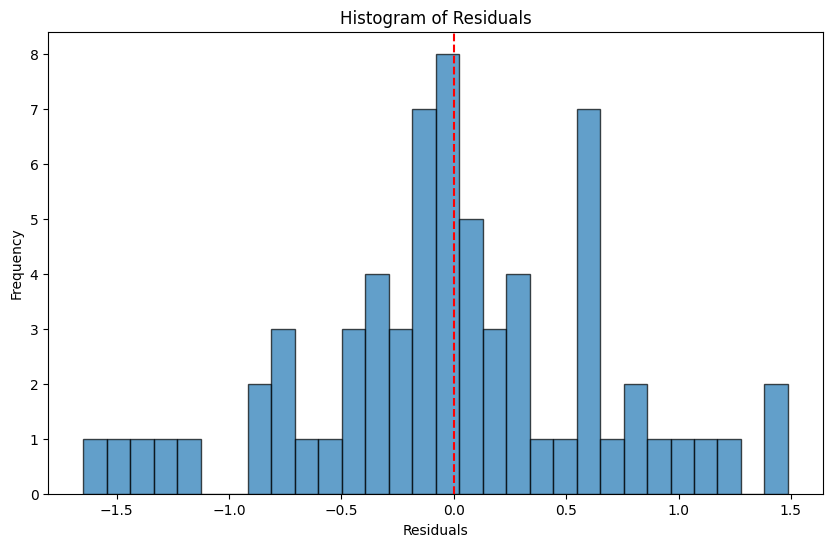

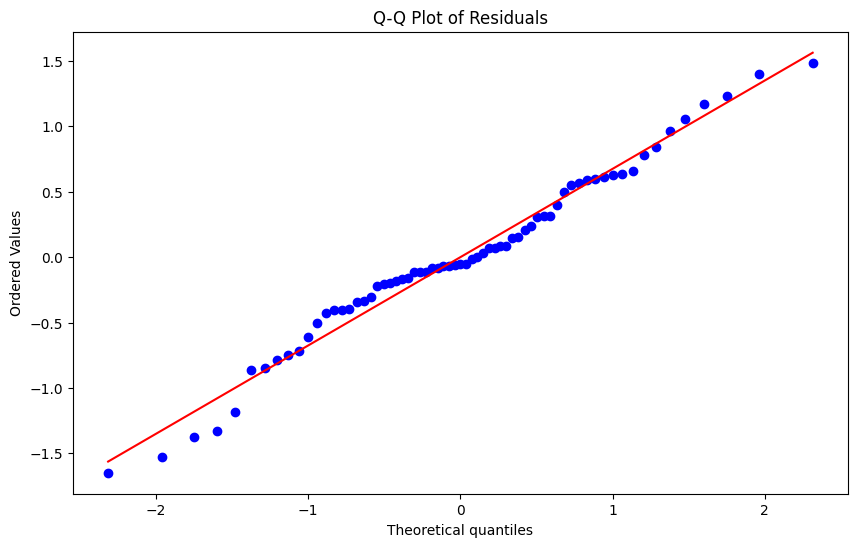

In [5]:
nlr_model_crafter.plot_residuals()

## Feature Selection Based on Z-Scores

### Objective

This section details a method for refining our linear regression model by excluding non-statistically significant features, identified through Z-scores derived from model residuals. This process is aimed at reducing bias by focusing on variables that significantly impact the target variable.

### Methodology

Z-scores, indicating how many standard deviations a data point is from the mean, are used here to assess the statistical significance of each feature's contribution to the model. By evaluating the Z-scores of residuals from a linear regression model, we can discern which features are statistically significant. Those with Z-scores beyond a certain threshold suggest insignificance and are considered for exclusion.

### Bias Reduction

Eliminating features based on Z-score analysis streamlines the model, emphasizing bias reduction by retaining only impactful predictors. This method enhances model simplicity and interpretability, focusing on accuracy over complexity.

### Implementing F-Statistic Evaluation

After identifying non-significant features via Z-scores, we employ the F-statistic to collectively assess the impact of dropping these features. The F-test evaluates the null hypothesis that all coefficients of the identified features are zero. Rejecting this hypothesis indicates that at least one of the excluded features contributes significantly to the model, warranting a reassessment of which features to drop.

### Implementation Steps

1. **Initial Model:** Fit a linear regression model with all features.
2. **Calculate Residuals:** Determine residuals for each observation.
3. **Z-Score Analysis:** Calculate Z-scores for residuals to identify non-significant features.
4. **F-Statistic Test:** Apply the F-statistic to assess the collective impact of dropping all identified non-significant features simultaneously.
5. **Refine Model:** Based on F-statistic results, refine the feature set to exclude those that do not significantly affect model performance.

### Significance

This Z-score based feature selection, bolstered by F-statistic evaluation, ensures our model retains only statistically significant predictors. By judiciously reducing the feature set, we aim to construct a model that not only reduces bias but also holds statistical validity in its representation of the data relationships.


In [6]:
# TODO: Implement F-Statistic to test dropping all the non sig features

In [7]:
z_significant_features = list(
    nlr_summary_df.query("p_value < 0.04 and feature != 'Intercept'").feature
)

# Fitting a new linear regression model using only the significant features
z_model_crafter = OLS(fit_intercept=True)
z_model_crafter.fit(X_train_scaled[z_significant_features], y_train)

# Summary of the model fitted with Z-significant features
print("Model Crafter Summary:")
summary_df = z_model_crafter.summary()

Model Crafter Summary:
Feature              | Coefficients    | Std Err    | z          | P>|z|      | [0.025    | 0.975]    
Intercept            | 2.4523          | 0.0855     | 28.6827    | 0.0000     | [2.2848, 2.6199]
lcavol               | 0.6234          | 0.1098     | 5.6773     | 0.0000     | [0.4082, 0.8387]
lweight              | 0.2549          | 0.1004     | 2.5378     | 0.0137     | [0.0580, 0.4517]
lbph                 | 0.2034          | 0.0984     | 2.0671     | 0.0429     | [0.0105, 0.3962]
svi                  | 0.2801          | 0.1096     | 2.5562     | 0.0130     | [0.0653, 0.4948]


In [8]:
# Evaluate Performance
z_pred_test = z_model_crafter.predict(X_test_scaled[z_significant_features])

# Calculate Z LR performance metrics
z_mse = MSE(y_test, z_pred_test).calculate()
z_r2 = R2(y_test, z_pred_test).calculate()

# Print the Z LR baseline's prediction
print(f"{'Z Linear Regression MSE:'} {z_mse:.2f}")
print(f"{'Z Linear Regression R2:'} {z_r2:.2f}")

Z Linear Regression MSE: 0.46
Z Linear Regression R2: 0.57


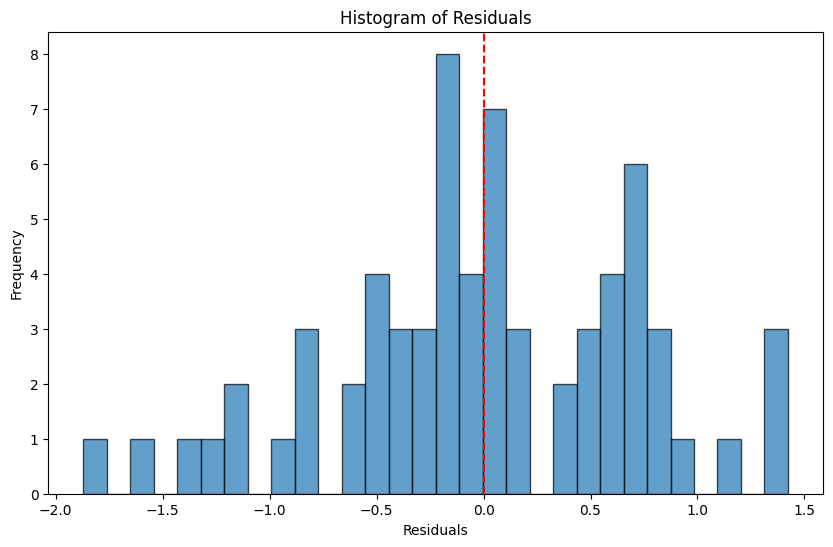

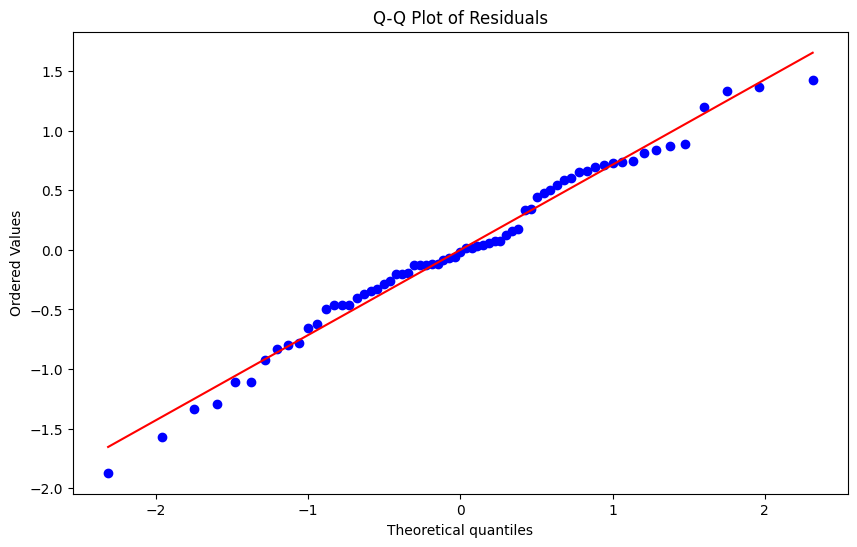

In [9]:
z_model_crafter.plot_residuals()

## Best Subset Selection

### Overview

Best subset selection is a feature selection method aimed at identifying the most significant subset of predictors for our linear regression model. By evaluating all possible combinations of predictors, this technique aspires to find the optimal model that either minimizes prediction error or maximizes explained variance.

### Objective

The primary goal is to enhance model performance and interpretability by selecting a subset of features that provides the best balance between complexity and predictive accuracy. This approach helps in mitigating overfitting and improving model generalization on unseen data.

### Methodology

1. **Enumerate All Possible Models**: For each possible subset of features, from the empty model (containing no predictors) up to the full model (containing all predictors), fit a linear regression model.
2. **Evaluate Model Performance**: Assess each model based on a chosen criterion, such as AIC, BIC, R², or adjusted R², to gauge both its predictive performance and complexity.
3. **Select Optimal Model**: Identify the model that best meets our selection criterion, balancing the trade-off between model simplicity and predictive power.

### Expected Outcomes

- **Optimal Feature Set**: Identification of the subset of features that leads to the most effective linear regression model according to the specified evaluation criterion.
- **Improved Model Performance**: By focusing on only the most impactful predictors, we anticipate improvements in prediction accuracy and model interpretability.
- **Insights into Feature Significance**: Gaining a deeper understanding of which features are most influential in predicting the target variable, thereby providing valuable insights into the underlying data relationships.

### Significance

Implementing best subset selection allows us to rigorously evaluate the contribution of each predictor to the model's performance. This systematic approach is invaluable for developing highly effective and interpretable models, particularly in scenarios where predictor variables are numerous and their relationships with the target variable are complex.


Total models to fit: 255


Fitting Models: 100%|██████████| 255/255 [00:00<00:00, 1178.69it/s]


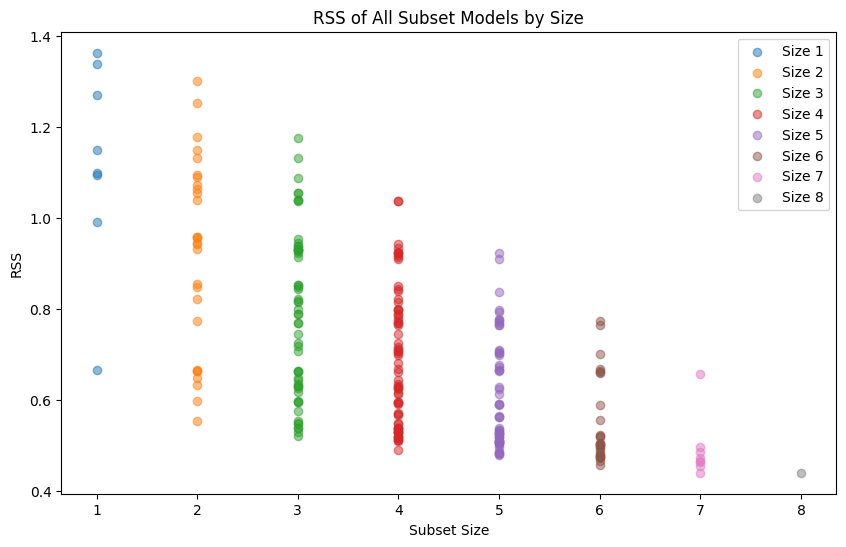

In [10]:
from crafter.regularization.subset_selection import (
    SubsetSelection,
    AnalyticalInsights,
    Visualization,
)

# FIXME: THIS IS NOT SELECTING THE FEATURES PROPERLY
# Step 1: Initialize and Fit the Subset Selection Model
subset_selector = SubsetSelection(X_train_scaled, y_train)
subset_selector.fit()

# Step 2: Analyze the Model Evaluations
# Generate a DataFrame from the model evaluations for further analysis
analysis = AnalyticalInsights(subset_selector.model_evaluations)
analysis_df = analysis.generate_insights_df()

# Step 3: Visualization of Results
# Plot the RSS for all models by subset size to visualize which size offers the best trade-off
Visualization.plot_rss_by_subset_size(analysis_df)

In [11]:
models = pd.DataFrame(subset_selector.model_evaluations)

In [29]:
features = models[models["MSE"] == models["MSE"].min()]["features"]
features

254    [lcavol, lweight, age, lbph, svi, lcp, gleason...
Name: features, dtype: object

In [30]:
features.values

array([list(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'])],
      dtype=object)

In [22]:
X_train_scaled[list(features)]

KeyError: "None of [Index([('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')], dtype='object')] are in the [columns]"

In [14]:
bss_model = subset_selector.best_model
bss_features = list(subset_selector.best_features)

# Evaluate Performance
bss_pred_test = bss_model.predict(X_test_scaled[bss_features])

# Calculate Z LR performance metrics
bss_mse = MSE(y_test, bss_pred_test).calculate()
bss_r2 = R2(y_test, bss_pred_test).calculate()

# Print the Z LR baseline's prediction
print(f"{'BSS Linear Regression MSE:'} {bss_mse:.2f}")
print(f"{'BSS Linear Regression R2:'} {bss_r2:.2f}")

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
# Fitting a new linear regression model using only the significant features
bss_model_crafter = OLS(fit_intercept=True)
bss_model_crafter.fit(X_train_scaled[bss_features], y_train)

# Summary of the model fitted with Z-significant features
print("Model Crafter Summary:")
summary_df = bss_model_crafter.summary()

In [ ]:
# Evaluate Performance
bss_pred_test = bss_model_crafter.predict(X_test_scaled[bss_features])

# Calculate Z LR performance metrics
bss_mse = MSE(y_test, bss_pred_test).calculate()
bss_r2 = R2(y_test, bss_pred_test).calculate()

# Print the Z LR baseline's prediction
print(f"{'BSS Linear Regression MSE:'} {bss_mse:.2f}")
print(f"{'BSS Linear Regression R2:'} {bss_r2:.2f}")